In [2]:
import pandas as pd
import numpy as np
import xlrd
from itertools import chain

In [11]:
#Dataset 1 - foodAtlas.xls; Taking health data.
df1 = pd.read_excel('foodAtlas.xls','Supplemental Data - County',dtype = {'FIPS ' : "str"})
list_cols1 = list(v for v in chain(df1.columns[0:3], df1.columns[6:7], df1.columns[9:10]))
health_1 = df1[list_cols1]
print(health_1.head())
df2 = pd.read_excel('foodAtlas.xls','HEALTH',dtype = {'FIPS' : "str"})
list_cols2 = list(v for v in chain(df2.columns[0:1], df2.columns[4:5], df2.columns[6:7], df2.columns[9:10]))
health_2 = df2[list_cols2]
print(health_2.head())

   FIPS      State    County Population Estimate, 2013  \
0  01001   Alabama  Autauga                     54,792   
1  01003   Alabama  Baldwin                    195,147   
2  01005   Alabama  Barbour                     26,938   
3  01007   Alabama     Bibb                     22,501   
4  01009   Alabama   Blount                     57,746   

  Population Estimate, 2016  
0                    55,416  
1                   208,563  
2                    25,965  
3                    22,643  
4                    57,704  
    FIPS  PCT_DIABETES_ADULTS13  PCT_OBESE_ADULTS13  RECFAC14
0  01001                   13.0                34.1         5
1  01003                   10.4                27.4        25
2  01005                   18.4                44.4         0
3  01007                   14.8                40.3         1
4  01009                   14.1                34.6         3


In [12]:
#Merging two sheets from excelfile - population estimate and obesity, diabetes rates
health_1.rename(columns = {'FIPS ' : 'FIPS'}, inplace = True)
print((health_1.columns.values[0]) == 'FIPS')
health_1= health_1.merge(health_2, how = 'inner', left_on = 'FIPS', right_on = 'FIPS')
health_1.head()

True


C:\Users\Samyuktha\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,FIPS,State,County,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFAC14
0,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5
1,01003,Alabama,Baldwin,"195,147","208,563",10.4,27.4,25
2,01005,Alabama,Barbour,"26,938","25,965",18.4,44.4,0
3,01007,Alabama,Bibb,"22,501","22,643",14.8,40.3,1
4,01009,Alabama,Blount,"57,746","57,704",14.1,34.6,3


In [13]:
#Taking fastfood and recreation centre features from the "RESTAURANTS" sheet.
df3 = pd.read_excel('foodAtlas.xls','RESTAURANTS',dtype = {'FIPS' : "str"})
list_cols3 = list(v for v in chain(df3.columns[0:1], df3.columns[4:5]))
health_3 = df3[list_cols3]
print(health_3.head())

    FIPS  FFR14
0  01001     36
1  01003    132
2  01005     22
3  01007      5
4  01009     21


In [14]:
#Combining all the extracted features from foodAtlas.xls to obtain consolidated health dataset
health = health_1.merge(health_3, how = 'inner', left_on = 'FIPS', right_on = 'FIPS')
health.head()

,FIPS,State,County,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFAC14,FFR14
0,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36
1,01003,Alabama,Baldwin,"195,147","208,563",10.4,27.4,25,132
2,01005,Alabama,Barbour,"26,938","25,965",18.4,44.4,0,22
3,01007,Alabama,Bibb,"22,501","22,643",14.8,40.3,1,5
4,01009,Alabama,Blount,"57,746","57,704",14.1,34.6,3,21


In [15]:
#Mapping Zipcodes and FIPSCode
df4 = pd.read_csv('zipcode_fipscode.csv',dtype = "str")
list_cols4 = list(v for v in chain(df4.columns[0:1], df4.columns[3:4]))
zip_data = df4[list_cols4]
print(zip_data.head())

     ZIP STCOUNTYFP
0  36003      01001
1  36006      01001
2  36008      01001
3  36022      01001
4  36051      01001


In [16]:
#Mapping Zipcodes to the health data
health = health.merge(zip_data, how = 'inner', left_on = 'FIPS', right_on = 'STCOUNTYFP')
health.head()

,FIPS,State,County,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFAC14,FFR14,ZIP,STCOUNTYFP
0,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36003,01001
1,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36006,01001
2,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36008,01001
3,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36022,01001
4,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36051,01001


In [18]:
#Dataset 2 - Income2013; Extracting zipcode, total income.
incomeDF = pd.read_csv('income_13.csv',dtype ={'zipcode': "str"})
list_cols5 = list(v for v in chain(incomeDF.columns[2:3], incomeDF.columns[12:14]))
income = incomeDF[list_cols5]
print(income.head(15))

Index(['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'MARS1', 'MARS2',
       'MARS4', 'PREP', 'N2',
       ...
       'N10300', 'A10300', 'N85330', 'A85330', 'N85300', 'A85300', 'N11901',
       'A11901', 'N11902', 'A11902'],
      dtype='object', length=114)
   zipcode    N02650      A02650
0    00000  870380.0  11444868.0
1    00000  490960.0  17810952.0
2    00000  258810.0  16070153.0
3    00000  163290.0  14288572.0
4    00000  192050.0  26053920.0
5    00000   46890.0  20752068.0
6    35004    1530.0     19851.0
7    35004    1330.0     49338.0
8    35004     910.0     56170.0
9    35004     610.0     52977.0
10   35004     510.0     64329.0
11   35004      40.0     15359.0
12   35005    1390.0     19011.0
13   35005    1030.0     36996.0
14   35005     470.0     28664.0


In [19]:
#merging health and income dataset
dataSet = health.merge(income, how = 'inner', left_on = 'ZIP', right_on = 'zipcode')
dataSet.head(15)

,FIPS,State,County,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFAC14,FFR14,ZIP,STCOUNTYFP,zipcode,N02650,A02650
0,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36003,01001,36003,420.0,5737.0
1,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36003,01001,36003,190.0,6934.0
2,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36003,01001,36003,80.0,5106.0
3,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36003,01001,36003,60.0,4880.0
4,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36003,01001,36003,60.0,8648.0
5,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36003,01001,36003,0.0,0.0
6,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36006,01001,36006,250.0,3386.0
7,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36006,01001,36006,160.0,5737.0
8,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36006,01001,36006,80.0,5089.0
9,01001,Alabama,Autauga,"54,792","55,416",13.0,34.1,5,36,36006,01001,36006,60.0,4832.0


In [20]:
#Grouping them by taking aggregates of total income.
dataSet = dataSet.groupby(by = 'FIPS').agg({'N02650' : sum , 'A02650' : sum, 'Population Estimate, 2013' : max, 'Population Estimate, 2016' : max, 'PCT_DIABETES_ADULTS13' : max, 'PCT_OBESE_ADULTS13' : max , 'FFR14':max, 'RECFAC14':max })
dataSet.head()

,N02650,A02650,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,FFR14,RECFAC14
FIPS,,,,,,,,
01001,34230.0,1659673.0,"54,792","55,416",13.0,34.1,36,5
01003,90660.0,5118057.0,"195,147","208,563",10.4,27.4,132,25
01005,11480.0,446600.0,"26,938","25,965",18.4,44.4,22,0
01007,23170.0,1124762.0,"22,501","22,643",14.8,40.3,5,1
01009,63020.0,3023206.0,"57,746","57,704",14.1,34.6,21,3


In [22]:
dataSet.to_csv("combinedDataset.csv", sep = ',')
dataSet.head()

,N02650,A02650,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,FFR14,RECFAC14
FIPS,,,,,,,,
01001,34230.0,1659673.0,"54,792","55,416",13.0,34.1,36,5
01003,90660.0,5118057.0,"195,147","208,563",10.4,27.4,132,25
01005,11480.0,446600.0,"26,938","25,965",18.4,44.4,22,0
01007,23170.0,1124762.0,"22,501","22,643",14.8,40.3,5,1
01009,63020.0,3023206.0,"57,746","57,704",14.1,34.6,21,3


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

[[ 1.         -0.20260678]
 [-0.20260678  1.        ]]


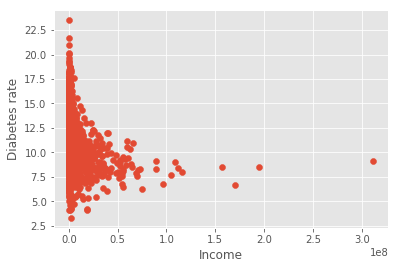

In [30]:
#Finding correlation between Income and Diabetes
x1 = dataSet.iloc[:,1]
y1 = dataSet.iloc[:,4]
print(np.corrcoef(x1,y1))
plt.xlabel('Income')
plt.ylabel('Diabetes rate')
plt.scatter(x1, y1)
plt.show()

[[ 1.         -0.27501763]
 [-0.27501763  1.        ]]


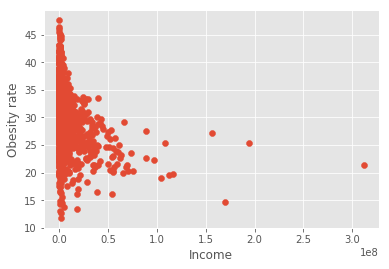

In [28]:
#correlation between income and obesity
x2 = dataSet.iloc[:,1]
y2 = dataSet.iloc[:,5]
print(np.corrcoef(x2,y2))
plt.scatter(x2, y2)
plt.xlabel('Income')
plt.ylabel('Obesity rate')
plt.show()

[[ 1.         -0.23232574]
 [-0.23232574  1.        ]]


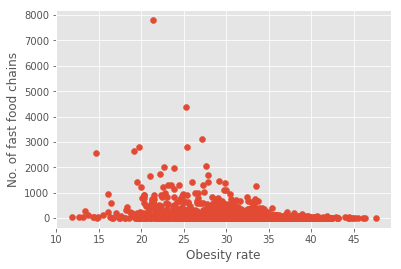

In [31]:
#Correlation between Obesity and fastfood centre
x3 = dataSet.iloc[:,5]
y3 = dataSet.iloc[:,6]
print(np.corrcoef(x3,y3))
plt.scatter(x3, y3)
plt.xlabel('Obesity rate')
plt.ylabel('No. of fast food chains')
plt.show()

[[1.         0.70098499]
 [0.70098499 1.        ]]


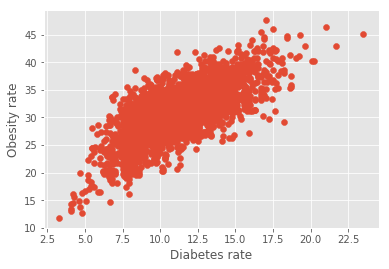

In [34]:
#corelation between obesity and diabetes rates
x4 = dataSet.iloc[:,4]
y4 = dataSet.iloc[:,5]
print(np.corrcoef(x4,y4))
plt.xlabel('Diabetes rate')
plt.ylabel('Obesity rate')
plt.scatter(x4, y4)
plt.show()

[[ 1.         -0.29067661]
 [-0.29067661  1.        ]]


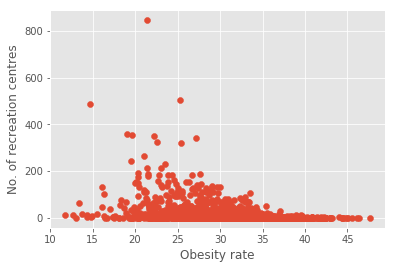

In [35]:
#Correlation between Obesity and recreation centre
x5 = dataSet.iloc[:,5]
y5 = dataSet.iloc[:,7]
print(np.corrcoef(x5,y5))
plt.scatter(x5, y5)
plt.xlabel('Obesity rate')
plt.ylabel('No. of recreation centres')
plt.show()

[[1.         0.97520283]
 [0.97520283 1.        ]]


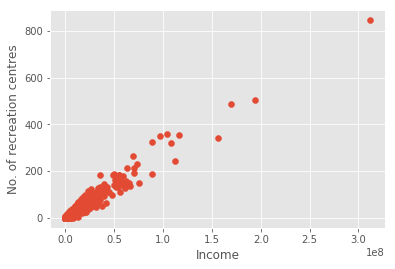

In [36]:
#Correlation between Income and recreation centre
x6 = dataSet.iloc[:,1]
y6 = dataSet.iloc[:,7]
print(np.corrcoef(x6,y6))
plt.scatter(x6, y6)
plt.xlabel('Income')
plt.ylabel('No. of recreation centres')
plt.show()

[[1.         0.95754064]
 [0.95754064 1.        ]]


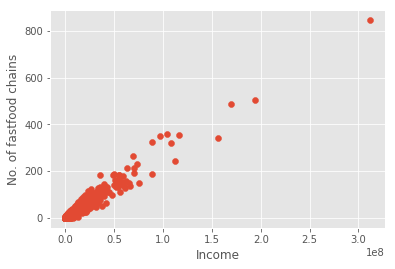

In [37]:
#Correlation between Income and fast food chains
x7 = dataSet.iloc[:,1]
y7 = dataSet.iloc[:,6]
print(np.corrcoef(x7,y7))
plt.scatter(x6, y6)
plt.xlabel('Income')
plt.ylabel('No. of fastfood chains')
plt.show()